In [ ]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

## Loading the data
!wget: Run the command as a shell command in Jupyter notebook

-O enron.db: Export the file with the name and type enron.db

https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1: URL of the file to download


In [ ]:
!pip install pandas
!pip install matplotlib

## Downloading Libraries
!pip: Python package manager

install: Use the package manager to install a library

pandas: Name of the library used for data manipulation and extraction

matplotlib: Name of the library used for data visualisation

In [1]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt

## Importing Libraries

import: Import the library or functions

from: Import a specific functions from the the library

as: Set an alias to use the function instead of typing out the library and function name to use it. For example **plt.plot** instead of **matplotlib.pyplot.plot**

In [2]:
def connect():
    return sqlite3.connect('enron.db')

## Connecting to the downloaded database
Using sqlite3 and the function connect() we can connect to the database and query it using pandas later on by returning it from a function.

In [3]:
conn = connect()

query = '''SELECT COUNT(rtype) as count, rtype
                FROM recipientinfo
                GROUP BY rtype'''

df = pd.read_sql_query(query,conn)

conn.close()

## Query the database and export the results as a dataframe
We saved the connection as a variable **conn**

Then we can write a regular sql query to retrieve the specific data. Here we are trying to retrieve the number of emails sent that are of different types: 'TO', 'CC, 'BCC'

Using pandas, we can export the results of the query by using `pd.read_sql_query()` and passing in two arguments.
1. The query in a string
2. The object of the connection to the database

After that, it is always good practice to `close()` the database connection

## Viewing and manipulation

In [5]:
print(df)

     count rtype
0   253713   BCC
1   253735    CC
2  1556994    TO


Here we are printing the dataframe that we exported from the database. We can see the number of emails sent via 'TO', 'CC' and 'BCC'

In [7]:
print(df.head(2))

    count rtype
0  253713   BCC
1  253735    CC


We can also grab the first N rows of the dataframe using `df.head(n)`

In [8]:
print(df.sort_values('count', ascending=False))

     count rtype
2  1556994    TO
1   253735    CC
0   253713   BCC


We can also reorder the dataframe into descending order based on the `count` column

In [10]:
rtype = df['rtype']
count = df['count']

print(rtype)
print(count)

0    BCC
1     CC
2     TO
Name: rtype, dtype: object
0     253713
1     253735
2    1556994
Name: count, dtype: int64


## Visualisation

To begin ploting the dataframe into a graph, lets flatten the dataframe into two arrays.

There are many different types of graphs we can plot. 
- Horizontal Bar graph: `plt.barh(rtype, count)`
- Line graph: `plt.plot(rtype, count)`
- Pie graph: `plt.pie(count, labels=rtype)`

We can also add labels to certain graphs with x axis and y axis labels
- X Axis Label: `plt.xlabel('STRING')`
- Y Axis Label: `plt.ylabel('STRRING')`

To enable exact values to show in a bar graph we can emurate the each column and add the label (SOURCE: ChatGPT)

In [12]:
#for i, v in enumerate(count):
#    plt.text(v, i, str(v), ha='right', va='center')

Lets generate a bar graph of the results we got

<BarContainer object of 3 artists>

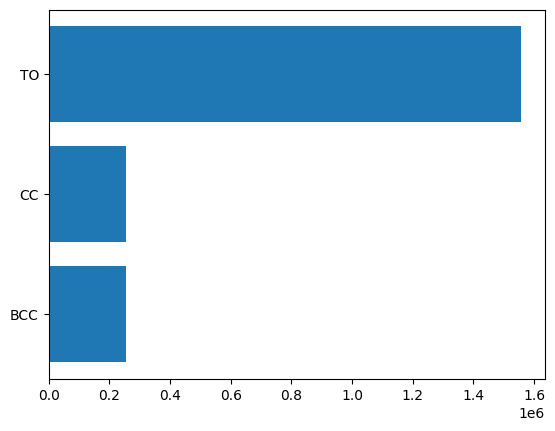

In [13]:
plt.barh(rtype, count)

Now lets add the exact value labels from before

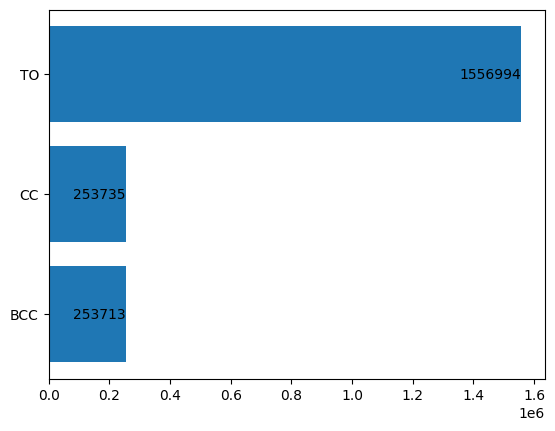

In [15]:
plt.barh(rtype, count)
for i, v in enumerate(count):
    plt.text(v, i, str(v), ha='right', va='center')

plt.show()

## Extras
In the **query.py** we used a different method to count the number of key action words used in email subject lines based on **words.csv** list.

Here's the function below

In [45]:
def keywords():

    conn = connect()

    # Query
    query = '''SELECT date, LOWER(subject) as subject
                FROM message
                WHERE date BETWEEN '2001-09-01' AND '2001-12-31'
                ORDER BY date DESC'''
    
    # Read the query and convert into dataframe
    df = pd.read_sql_query(query, conn)

    # Close connection
    conn.close()

    common_words_df = pd.read_csv('words.csv')
    
    word_counts = {}

    # Iterate each subject line in list of subjects
    for subject in df['subject']:
        # Iterate each word in common 1000 action words
        for word in common_words_df['words']:
            # If the word exist in the subject
            if word in subject:
                # If the word is already being counted
                if word in word_counts:
                    word_counts[word] += 1
                else:
                    word_counts[word] = 1

    # Create a dataframe from the object with two columns ['key', 'value']
    word_counts_df = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])

    # Sort into descesding order based on counter
    word_counts_df = word_counts_df.sort_values('count', ascending=False)

    # Grab the top 10 most used words
    top_10_df = word_counts_df.head(10)

    # Convert into array for x and y
    words = top_10_df['word'].values
    count = top_10_df['count'].values

    # Reorder into descending order for graph
    words = words[::-1]
    count = count[::-1]

    # Plot the horizontal bar graph
    plt.title("Top 10 Subject Keywords")
    plt.ylabel("Keyword")
    plt.xlabel("Count")
    plt.barh(words, count)
    # Add labels for the bar graph
    ###############################
    # SOURCE: CHATGPT
    for i, v in enumerate(count):
        plt.text(v, i, str(v), ha='right', va='center')
    ###############################
    plt.show()

We can convert .csv files into dataframes using `pd.read_csv('file_name')`

In [16]:
csv_df = pd.read_csv('words.csv')

print(csv_df)

        words  Unnamed: 1
0     abandon         NaN
1      abduct         NaN
2        ably         NaN
3     abolish         NaN
4     abscond         NaN
...       ...         ...
997      yell         NaN
998      yelp         NaN
999     yield         NaN
1000      zap         NaN
1001      zip         NaN

[1002 rows x 2 columns]


Here we can see the list of 1000 common action words. We will use this to filter against the email subjects

In [19]:
conn = connect()

# Query
query = '''SELECT date, LOWER(subject) as subject
            FROM message
            WHERE date BETWEEN '2001-09-01' AND '2001-12-31'
            ORDER BY date DESC'''

# Read the query and convert into dataframe
subject_df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

Taking a snippet of the function. Lets retrieve the list of email subject messages and print the first 10 results

In [20]:
print(subject_df.head(10))

                  date                                            subject
0  2001-12-30 23:42:30      ngi publications - monday, december 31st 2001
1  2001-12-30 23:42:13      ngi publications - monday, december 31st 2001
2  2001-12-30 23:40:15      ngi publications - monday, december 31st 2001
3  2001-12-30 23:31:04                             new releases at cdnow!
4  2001-12-30 23:01:27          joel newton/ngccorp is out of the office.
5  2001-12-30 23:00:15                     "project doorstep" target date
6  2001-12-30 23:00:10                your mailbox is over its size limit
7  2001-12-30 23:00:03                your mailbox is over its size limit
8  2001-12-30 22:54:52            bubble trouble - realage tip of the day
9  2001-12-30 22:49:42  anchordesk: hope ahead: what i learned from 20...


In order to count the number of action words used in each email. We first have to iterate through each sentence. Taking one sentence at a time, we then have to iterate through each word from the 1000 action word list.
After that, we then compare and count if the word exists in the sentence and keep track of it.

In order to do so we can use an object

In [26]:
word_tracker = {}

An object has the ability to store 'key' and 'value' pairs. For example the 'key' in this case would be the word. The 'value would be the counter we are increasing everytime there's a match.

In [27]:
word = 'plan'
word_tracker[word] = 1

print(word_tracker)

{'plan': 1}


Here we are defining the variable of a word to 'plan'
We add a new key to the object by defining object[key] and setting it to = 1 as the value

In [28]:
word_tracker[word] += 1
print(word_tracker)

{'plan': 2}


If the word is already being kept track of, we can just increase it by one using += 1

In short using this iterative loop we can get the count of all the action words used in email subjects

In [30]:
word_count = {}

# Iterate each subject line in list of subjects
for subject in subject_df['subject']:
    # Iterate each word in common 1000 action words
    for word in csv_df['words']:
        # If the word exist in the subject
        if word in subject:
            # If the word is already being counted
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

print(word_count)

{'ease': 1050, 'do': 2202, 'get': 744, 'project': 495, 'step': 131, 'target': 56, 'size': 167, 'tip': 97, 'earn': 222, 'head': 988, 'learn': 32, 'double': 15, 'report': 2296, 'increase': 230, 'pick': 133, 'balance': 229, 'shout': 10, 'assist': 87, 'count': 720, 'level': 28, 'win': 590, 'give': 51, 'perfect': 43, 'play': 143, 'work': 667, 'enter': 461, 'model': 91, 'review': 556, 'cure': 52, 'edit': 1472, 'prove': 153, 'secure': 15, 'ride': 43, 'find': 44, 'start': 603, 'elect': 559, 'select': 44, 'check': 186, 'meet': 2855, 'plan': 1095, 'aim': 152, 'pass': 294, 'sit': 1767, 'form': 1193, 'inform': 756, 'act': 2535, 'contract': 788, 'forecast': 200, 'drug': 11, 'install': 18, 'extend': 67, 'save': 196, 'help': 117, 'boost': 11, 'offer': 304, 'party': 316, 'detail': 110, 'cut': 278, 'slide': 68, 'rally': 20, 'rip': 286, 'trip': 156, 'found': 44, 'chase': 243, 'purchase': 199, 'survey': 243, 'alert': 229, 'service': 527, 'rock': 212, 'perform': 98, 'add': 542, 'address': 258, 'change': 1

Following that we can convert it into a dataframe by using pandas. First lets convert into into a dictionary

In [32]:
dictionary = word_count.items()
print(dictionary)

dict_items([('ease', 1050), ('do', 2202), ('get', 744), ('project', 495), ('step', 131), ('target', 56), ('size', 167), ('tip', 97), ('earn', 222), ('head', 988), ('learn', 32), ('double', 15), ('report', 2296), ('increase', 230), ('pick', 133), ('balance', 229), ('shout', 10), ('assist', 87), ('count', 720), ('level', 28), ('win', 590), ('give', 51), ('perfect', 43), ('play', 143), ('work', 667), ('enter', 461), ('model', 91), ('review', 556), ('cure', 52), ('edit', 1472), ('prove', 153), ('secure', 15), ('ride', 43), ('find', 44), ('start', 603), ('elect', 559), ('select', 44), ('check', 186), ('meet', 2855), ('plan', 1095), ('aim', 152), ('pass', 294), ('sit', 1767), ('form', 1193), ('inform', 756), ('act', 2535), ('contract', 788), ('forecast', 200), ('drug', 11), ('install', 18), ('extend', 67), ('save', 196), ('help', 117), ('boost', 11), ('offer', 304), ('party', 316), ('detail', 110), ('cut', 278), ('slide', 68), ('rally', 20), ('rip', 286), ('trip', 156), ('found', 44), ('chas

Then convert it into a list

In [33]:
list(dictionary)

[('ease', 1050),
 ('do', 2202),
 ('get', 744),
 ('project', 495),
 ('step', 131),
 ('target', 56),
 ('size', 167),
 ('tip', 97),
 ('earn', 222),
 ('head', 988),
 ('learn', 32),
 ('double', 15),
 ('report', 2296),
 ('increase', 230),
 ('pick', 133),
 ('balance', 229),
 ('shout', 10),
 ('assist', 87),
 ('count', 720),
 ('level', 28),
 ('win', 590),
 ('give', 51),
 ('perfect', 43),
 ('play', 143),
 ('work', 667),
 ('enter', 461),
 ('model', 91),
 ('review', 556),
 ('cure', 52),
 ('edit', 1472),
 ('prove', 153),
 ('secure', 15),
 ('ride', 43),
 ('find', 44),
 ('start', 603),
 ('elect', 559),
 ('select', 44),
 ('check', 186),
 ('meet', 2855),
 ('plan', 1095),
 ('aim', 152),
 ('pass', 294),
 ('sit', 1767),
 ('form', 1193),
 ('inform', 756),
 ('act', 2535),
 ('contract', 788),
 ('forecast', 200),
 ('drug', 11),
 ('install', 18),
 ('extend', 67),
 ('save', 196),
 ('help', 117),
 ('boost', 11),
 ('offer', 304),
 ('party', 316),
 ('detail', 110),
 ('cut', 278),
 ('slide', 68),
 ('rally', 20),
 (

We are almost there. You can see that now it's been separated into what's essentially two columns ('word', value)

By using `pd.Dataframe(list, columns=['col1', 'col2'])` we can convert this list into a dataframe

In [34]:
word_counts_df = pd.DataFrame(list(word_count.items()), columns=['word', 'count'])

Then we can sort it into descending order based on the top count and print the top 10 action words

In [35]:
# Sort into descesding order based on counter
word_counts_df = word_counts_df.sort_values('count', ascending=False)

# Grab the top 10 most used words
top_10_df = word_counts_df.head(10)

print(top_10_df)

       word  count
38     meet   2855
45      act   2535
79   update   2402
12   report   2296
1        do   2202
42      sit   1767
29     edit   1472
128    mark   1345
43     form   1193
153    call   1144
